# Airbnb

### Objetivo

Como Objetivo nos encargaremos de poder preveer los precios de distintos inmuebles en alquiler tanto Para alquileres temporarios o fijos mediante el usao de los datos y las disposiciones geograficas

### Contexto comercial


Durante la última década, Airbnb ha experimentado una transformación fenomenal en el ámbito del alquiler de alojamientos, tanto con fines turísticos como de soluciones habitacionales. Lo que en sus inicios fue una idea para compartir espacios privados ha evolucionado en un gigante global que conecta a millones de viajeros con alojamientos únicos en más de 220 países y regiones.

Este conjunto de datos se sumerge en la vasta cantidad de información generada por Airbnb desde sus inicios, con el objetivo de llevar a cabo un análisis estadístico exhaustivo de los alquileres a nivel global que ofrece la plataforma.




Este proyecto de análisis de datos se enfoca en el exhaustivo estudio de la base de datos global de Airbnb con el propósito de anticipar los valores de alquiler de inmuebles en diversas ubicaciones a nivel mundial. Mediante técnicas de análisis estadístico y modelado predictivo, exploramos patrones y relaciones entre distintas variables, lo que permite la creación de modelos  para estimar los precios de alquiler. Este resumen presenta una visión general de este análisis de datos, con un enfoque en la generación de pronósticos de alquiler precisos y útiles para los interesados en la plataforma Airbnb y la industria del alojamiento en general.

 La motivación detrás de este proyecto radica en la creciente importancia de la economía compartida y la necesidad de obtener información precisa y oportuna sobre los precios de alquiler en todo el mundo. El sector de alquileres a corto plazo, liderado por plataformas como Airbnb, ha experimentado un rápido crecimiento y se ha convertido en una opción de alojamiento popular para viajeros y anfitriones por igual. Comprender los factores que influyen en los precios de alquiler, así como la capacidad de anticipar estos valores, es fundamental para los usuarios, anfitriones, inversionistas y la industria hotelera en su conjunto. Este proyecto se motiva por la necesidad de proporcionar una visión más profunda y predictiva en un mercado dinámico y en constante evolución.




## Hipotesis de trabajo





*  ¿La ubicación de la propiedad tiene un impacto significativo en el precio de alquiler?

*   ¿Qué ripo de alquileres genran más beneficios?

*   ¿Podemos Predecir los precios optimos de alquiler de nuestra propiedad?

*   ¿La política de cancelación seleccionada por el anfitrión afecta la tasa de cancelación de reservas?





### Contexto analítico

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import gdown
import statsmodels.formula.api as sm
from scipy import stats
import seaborn as sns


In [ ]:
### 1- Cargamos las librerias Necesarias para Descargar Nuestro Dataset
url = 'https://drive.google.com/uc?id=1XyZg9iNZ3khiJEeSUMs3RtQ2MAAMP2uz'
output = 'archivo.csv'
gdown.download(url, output, quiet=False)

print(f"El archivo '{output}' se ha descargado y tiene un tamaño de {os.path.getsize(output) / (1024 * 1024):.2f} MB.")

Downloading...
From: https://drive.google.com/uc?id=1XyZg9iNZ3khiJEeSUMs3RtQ2MAAMP2uz
To: /content/archivo.csv
100%|██████████| 1.94G/1.94G [00:22<00:00, 84.8MB/s]


El archivo 'archivo.csv' se ha descargado y tiene un tamaño de 1846.24 MB.


###  Leemos nueestro Dataset y lo cargamos en un Dataframe

In [ ]:
df=  pd.read_csv(output, sep=';' )

<ipython-input-3-082cd63119ea>:1: DtypeWarning: Columns (0,2,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df=  pd.read_csv(output, sep=';' )


###  Revisamos nuestros Datos

In [ ]:
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,4008728,https://www.airbnb.com/rooms/4008728,20170402075052,2017-04-02,"Luxurious 3 bedroom, centrum, 180m2",‪This luxurious apartment is situated in the c...,In the heart of hip & lively Amsterdam Centrum...,‪This luxurious apartment is situated in the c...,none,There is a wide variety of cafes and restauran...,...,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,1.52,"52.36523660409065, 4.878249575101092","Host Has Profile Pic,Host Identity Verified,Is..."
1,7778612,https://www.airbnb.com/rooms/7778612,20170402075052,2017-04-02,Luxury apartment in city centre,"Beautiful, large (105m2, 2 floors) and quiet a...",1 living room 1 dining room 2 bedrooms 1 bathr...,"Beautiful, large (105m2, 2 floors) and quiet a...",none,Within a few minutes walking you'll be in the ...,...,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,0.81,"52.367309030897516, 4.8738407410699915","Host Is Superhost,Host Has Profile Pic,Host Id..."
2,8264596,https://www.airbnb.com/rooms/8264596,20170402075052,2017-04-02,Cosy apartment across Vondelpark,This central located apartment will make you f...,NaN,This central located apartment will make you f...,none,NaN,...,10.0,10.0,10.0,NaN,Amsterdam,flexible,1.0,0.05,"52.361943953804776, 4.866686522141489","Host Has Profile Pic,Host Identity Verified,Is..."
3,2180729,https://www.airbnb.com/rooms/2180729,20170402075052,2017-04-02,Spacious City Apartment Oud-West,Living like an Amsterdam resident in this ligh...,There are 2 bedrooms each with a double bed. I...,Living like an Amsterdam resident in this ligh...,none,The 85 m2 apartment is located on a quiet stre...,...,9.0,9.0,9.0,NaN,Amsterdam,flexible,1.0,0.62,"52.37014616115532, 4.866281767968382","Host Has Profile Pic,Host Identity Verified,Is..."
4,14463171,https://www.airbnb.com/rooms/14463171,20170402075052,2017-04-02,Cosy Studio Apartment Center Amsterdam,Studio Apartment Centre Amsterdam Perfect stud...,NaN,Studio Apartment Centre Amsterdam Perfect stud...,none,NaN,...,8.0,9.0,9.0,NaN,Amsterdam,moderate,1.0,2.04,"52.368817829014425, 4.871249476925455",Host Has Profile Pic


In [ ]:
df.describe()

,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,4.949540e+05,379884.000000,494449.000000,494448.000000,494953.000000,494953.000000,494891.000000,493428.000000,494328.000000,494037.000000,...,494952.000000,367134.000000,366237.000000,366479.000000,365918.000000,366434.000000,365969.000000,365873.000000,494087.000000,372947.000000
mean,3.234417e+07,93.376549,9.549721,9.549738,38.042292,-15.020974,3.311584,1.249632,1.378322,1.934525,...,16.740850,92.913988,9.527773,9.328483,9.692770,9.709972,9.471171,9.323047,6.869659,1.479523
std,3.172156e+07,17.592441,57.199523,57.199579,22.941429,70.364294,2.094052,0.607029,0.942508,1.488128,...,32.336701,8.543725,0.852536,1.035356,0.727947,0.719978,0.803260,0.903585,41.977381,1.731931
min,1.900000e+01,0.000000,0.000000,0.000000,-38.224427,-123.218712,1.000000,0.000000,0.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,6.886060e+06,98.000000,1.000000,1.000000,38.913119,-73.969216,2.000000,1.000000,1.000000,1.000000,...,1.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.320000
50%,2.188181e+07,100.000000,1.000000,1.000000,42.310894,2.137584,2.000000,1.000000,1.000000,1.000000,...,4.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.880000
75%,4.792177e+07,100.000000,3.000000,3.000000,51.375424,12.444849,4.000000,1.000000,2.000000,2.000000,...,18.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.030000
max,1.350885e+08,100.000000,1114.000000,1114.000000,55.994889,153.637837,21.000000,10.000000,96.000000,19.000000,...,735.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,752.000000,223.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494954 entries, 0 to 494953
Data columns (total 89 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              494954 non-null  object 
 1   Listing Url                     494954 non-null  object 
 2   Scrape ID                       494954 non-null  object 
 3   Last Scraped                    494953 non-null  object 
 4   Name                            494536 non-null  object 
 5   Summary                         478753 non-null  object 
 6   Space                           347019 non-null  object 
 7   Description                     494794 non-null  object 
 8   Experiences Offered             494954 non-null  object 
 9   Neighborhood Overview           291604 non-null  object 
 10  Notes                           197643 non-null  object 
 11  Transit                         303786 non-null  object 
 12  Access          

# Data Wrangling

### Revisamos Duplicados

In [ ]:
df.duplicated().value_counts()



False    494954
dtype: int64

In [ ]:
# Obtener la cantidad de filas en el DataFrame
cantidad_filas = df.shape[0]

# Imprimir la cantidad de filas
print("Cantidad de Filas:", cantidad_filas)

# Obtener la cantidad de filas duplicadas en el DataFrame
print('Cantidad de filas duplicadas:')
df.duplicated().value_counts()

# Obtener la cantidad de filas con Id duplicado en el DataFrame
print('Cantidad de filas con Id duplicado:')
df['ID'].duplicated().value_counts()

Cantidad de Filas: 494954
Cantidad de filas duplicadas:
Cantidad de filas con Id duplicado:


False    494952
True          2
Name: ID, dtype: int64

No tenemos filas *Duplicadas* pero si hay 4 filas con numeros de ID iguales. por lo que las revisamos para saber que diferencia tiene

In [ ]:
# Identificar las filas duplicadas basadas en la columna 'id'
duplicados = df[df.duplicated(subset='ID', keep=False)]

# Imprimir las filas duplicadas
print("Filas Duplicadas:")
print(duplicados)

Filas Duplicadas:
              ID                            Listing Url       Scrape ID  \
61500   12512133  https://www.airbnb.com/rooms/12512133  20160709001120   
261737   2832508   https://www.airbnb.com/rooms/2832508  20160709001120   
315850  12512133  https://www.airbnb.com/rooms/12512133  20160709001120   
420151   2832508   https://www.airbnb.com/rooms/2832508  20160709001120   

       Last Scraped                                 Name  \
61500    2016-07-09     Spacious Central 4 Bed Apartment   
261737   2016-07-09  Bethlehem way, Edinburgh , Scotland   
315850   2016-07-09     Spacious Central 4 Bed Apartment   
420151   2016-07-09  Bethlehem way, Edinburgh , Scotland   

                                                  Summary  \
61500   This light and airy apartment, located near Ge...   
261737  Whether you're in Edinburgh on business or lei...   
315850  This light and airy apartment, located near Ge...   
420151  Whether you're in Edinburgh on business or lei...   


In [ ]:

# Agrupar por ID y comparar valores en cada columna

for group_name, group_df in duplicados.groupby('ID'):
    if not group_df.drop('ID', axis=1).equals(group_df.iloc[0].drop('ID')):
        print(f"Diferencias en el grupo con ID {group_name}:")
        print(group_df)
        print("\n")

# Imprimir mensaje si no hay diferencias
if duplicados.empty:
    print("No hay filas duplicadas con diferencias en la información.")

Diferencias en el grupo con ID 2832508:
             ID                           Listing Url       Scrape ID  \
261737  2832508  https://www.airbnb.com/rooms/2832508  20160709001120   
420151  2832508  https://www.airbnb.com/rooms/2832508  20160709001120   

       Last Scraped                                 Name  \
261737   2016-07-09  Bethlehem way, Edinburgh , Scotland   
420151   2016-07-09  Bethlehem way, Edinburgh , Scotland   

                                                  Summary  \
261737  Whether you're in Edinburgh on business or lei...   
420151  Whether you're in Edinburgh on business or lei...   

                                                    Space  \
261737  The apartment is equipped with complimentary W...   
420151  The apartment is equipped with complimentary W...   

                                              Description Experiences Offered  \
261737  Whether you're in Edinburgh on business or lei...                none   
420151  Whether you're in Edi

Revisamos si los duplicados tenian alguna diferencia pero parece que son iguales por lo cual vamos a borrarlos

In [ ]:
# Eliminar filas duplicadas basadas en la columna 'id' del DataFrame original
df.drop_duplicates(subset='ID', keep=False, inplace=True)

   ###  Revisamos los Nulos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494950 entries, 0 to 494953
Data columns (total 89 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              494950 non-null  object 
 1   Listing Url                     494950 non-null  object 
 2   Scrape ID                       494950 non-null  object 
 3   Last Scraped                    494949 non-null  object 
 4   Name                            494532 non-null  object 
 5   Summary                         478749 non-null  object 
 6   Space                           347015 non-null  object 
 7   Description                     494790 non-null  object 
 8   Experiences Offered             494950 non-null  object 
 9   Neighborhood Overview           291600 non-null  object 
 10  Notes                           197639 non-null  object 
 11  Transit                         303782 non-null  object 
 12  Access          

In [ ]:
nulos= df.isnull().sum()
print(nulos)
porcentaje_nulos_por_columna = (df.isnull().sum() / len(df)) * 100
print(porcentaje_nulos_por_columna)


ID                                     0
Listing Url                            0
Scrape ID                              0
Last Scraped                           1
Name                                 418
                                   ...  
Cancellation Policy                    2
Calculated host listings count       867
Reviews per Month                 122007
Geolocation                            1
Features                             306
Length: 89, dtype: int64
ID                                 0.000000
Listing Url                        0.000000
Scrape ID                          0.000000
Last Scraped                       0.000202
Name                               0.084453
                                    ...    
Cancellation Policy                0.000404
Calculated host listings count     0.175169
Reviews per Month                 24.650369
Geolocation                        0.000202
Features                           0.061824
Length: 89, dtype: float64


In [ ]:
#Calculo y muestro variables con vacíos
valores_nulos  = df.isnull().sum()
columnas_con_nulos = valores_nulos[valores_nulos > 0]
print('Cantidad de columnas con valores vacíos:')
print(columnas_con_nulos.shape)
print('')
print('Variables con valores vacíos: ')
print(columnas_con_nulos.sort_values(ascending=False))

Cantidad de columnas con valores vacíos:
(83,)

Variables con valores vacíos: 
Has Availability        485643
Square Feet             482741
License                 480354
Host Acceptance Rate    452696
Monthly Price           398861
                         ...  
Latitude                     1
Longitude                    1
Bed Type                     1
Calendar Updated             1
Last Scraped                 1
Length: 83, dtype: int64


In [ ]:
# Columnas nulos
nulos = df.isnull().sum()
nulos_pct = nulos / df.shape[0]
nulos_resumen= pd.DataFrame({'Cant_Nulos': nulos,
                 'Pct_Nulos': nulos_pct})
nulos_resumen = nulos_resumen.loc[nulos_resumen['Cant_Nulos'] > 0,]
nulos_resumen = nulos_resumen.sort_values(by = 'Cant_Nulos',ascending=False)
nulos_resumen

,Cant_Nulos,Pct_Nulos
Has Availability,485643,0.981196
Square Feet,482741,0.975333
License,480354,0.970510
Host Acceptance Rate,452696,0.914630
Monthly Price,398861,0.805861
...,...,...
Latitude,1,0.000002
Longitude,1,0.000002
Bed Type,1,0.000002
Calendar Updated,1,0.000002


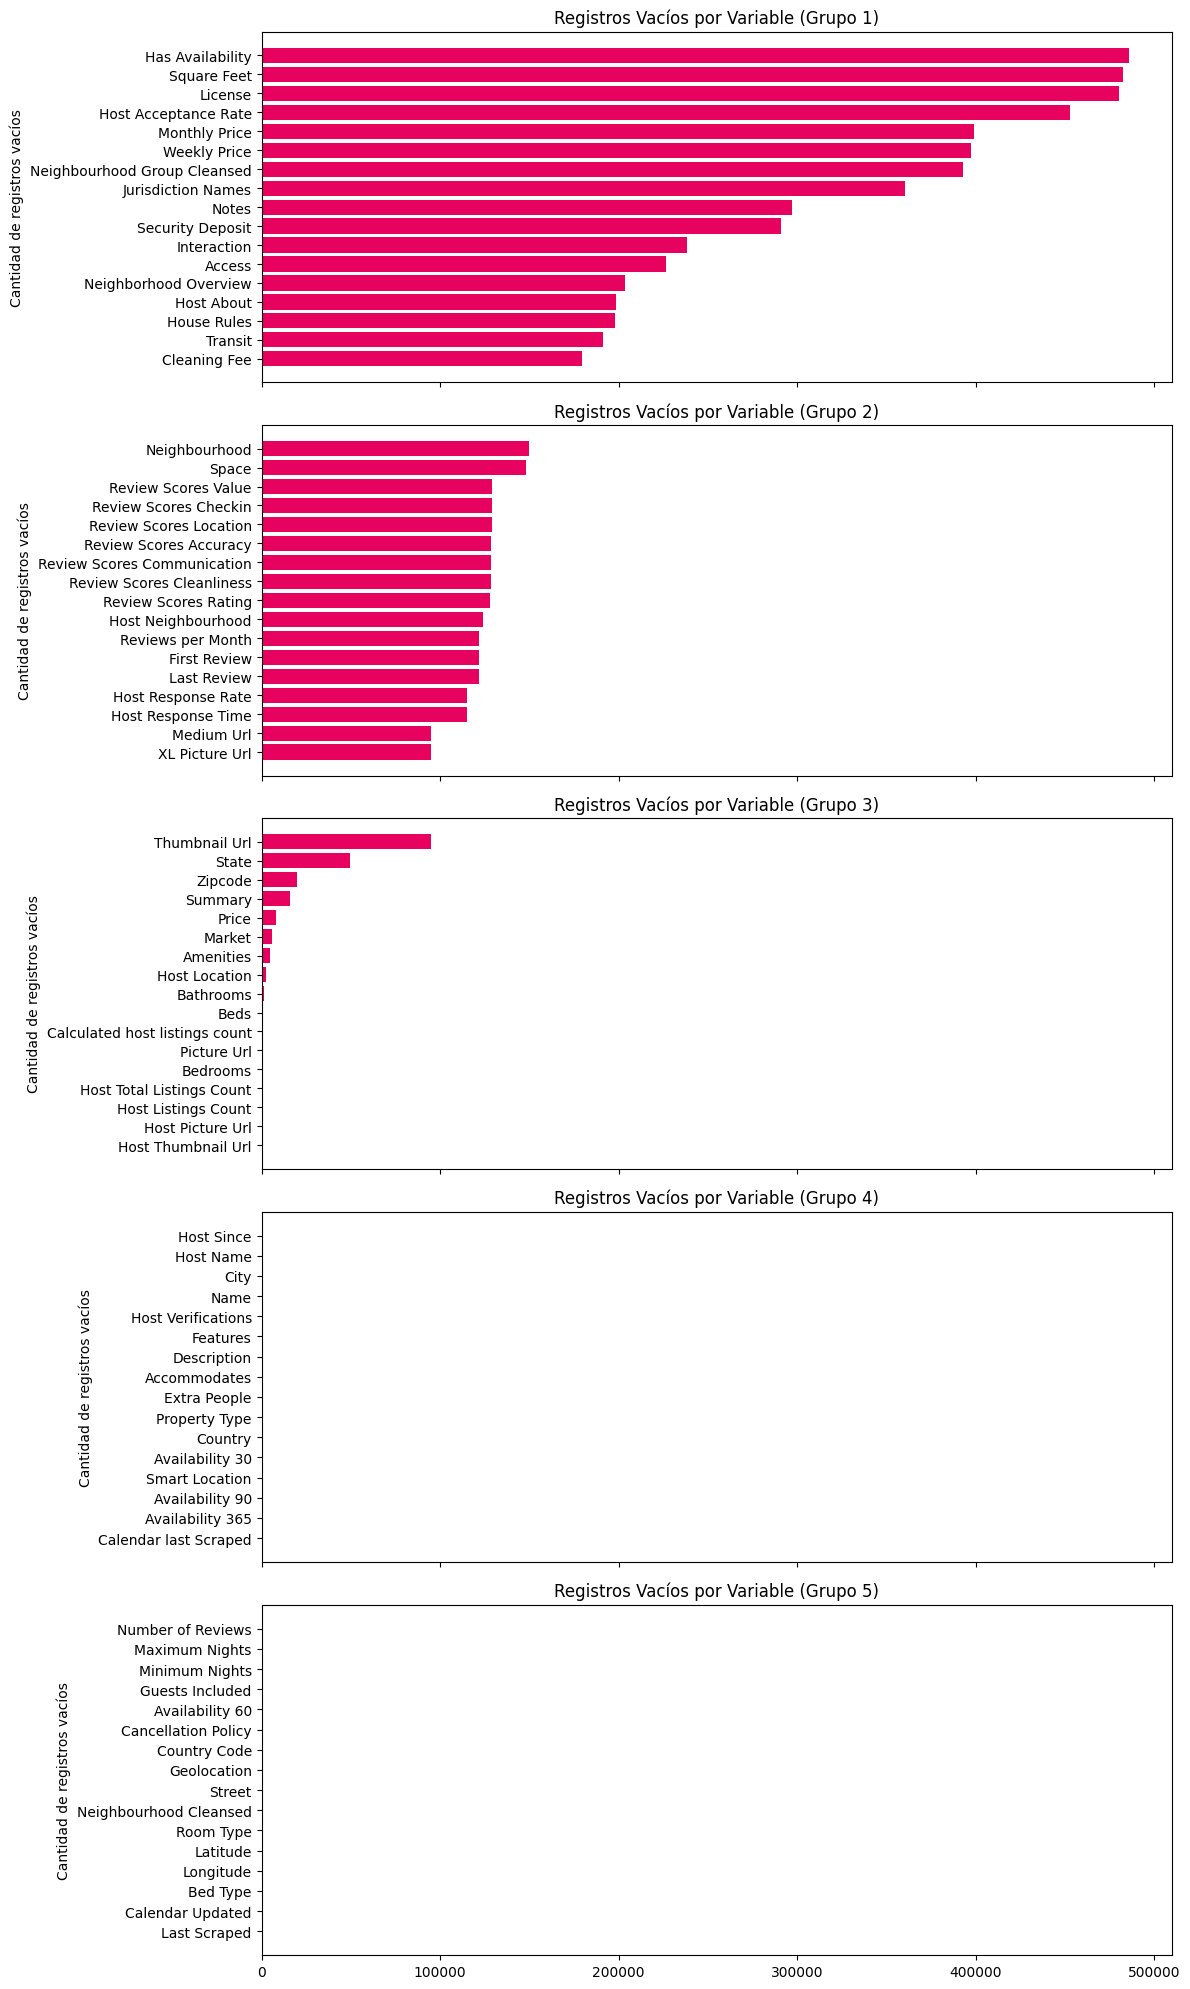

In [ ]:
# Ordenar de mayor a menor
columnas_con_nulos = columnas_con_nulos.sort_values(ascending=False)

# Dividir las columnas en grupos para subgráficos
num_subgrupos = 5  # Puedes ajustar según tus necesidades
grupos = np.array_split(columnas_con_nulos.index, num_subgrupos)

# Crear subgráficos
fig, axs = plt.subplots(num_subgrupos, 1, figsize=(12, 4 * num_subgrupos), sharex=True)

# Iterar sobre los subgrupos y crear barras horizontales para cada uno
for i, grupo in enumerate(grupos):
    axs[i].barh(grupo, columnas_con_nulos[grupo], color='#E70260')
    axs[i].invert_yaxis()
    axs[i].set_ylabel('Cantidad de registros vacíos')
    axs[i].set_title(f'Registros Vacíos por Variable (Grupo {i + 1})')

# Ajustar el diseño
plt.tight_layout()
plt.show()

###  Operamos sobre los que nos interesa Normalizar

Nos interesa realizar una interpolacion de los valores los cuales seran centrales para nuestro analisis estos son 'Square Feet', 'Weekly Price', 'Monthly Price', 'Price'y 'Security Deposit'. Los cuale para interpolarlos los agrupamos primero por país y segundo por tamaño de la propiedad.

In [ ]:
# Primero, ordena tus datos por 'Country' y 'Square Feet' para asegurarte de que estén en el orden correcto para la interpolación.
df.sort_values(['Country', 'Square Feet'], inplace=True)

# Llena los valores nulos en las columnas de interés utilizando la interpolación lineal.
columns_to_interpolate = ['Square Feet', 'Weekly Price', 'Monthly Price', 'Price', 'Security Deposit']
df[columns_to_interpolate] = df.groupby('Country')[columns_to_interpolate].transform(lambda x: x.interpolate())

# Vuelve a ordenar los datos según tu criterio original si es necesario.
df.sort_index(inplace=True)

### Eliminamos los que no usamos

In [ ]:
col_del = ['Has Availability','License','Host Acceptance Rate','Neighbourhood Group Cleansed','Jurisdiction Names', 'Notes']
df = df.drop(labels = col_del, axis=1)
df.shape

(494950, 83)

In [ ]:
fechas_host_since = df['Host Since']
print(fechas_host_since)

0         2014-09-01
1         2014-02-05
2         2014-11-12
3         2013-10-05
4         2016-08-10
             ...    
494949    2016-05-01
494950    2014-01-14
494951    2015-04-01
494952    2017-02-09
494953    2016-01-17
Name: Host Since, Length: 494950, dtype: object


In [ ]:
def es_fecha_valida(fecha_str):
    try:
        pd.to_datetime(fecha_str)
        return True
    except ValueError:
        return False

fechas_invalidas = df[~df['Host Since'].apply(es_fecha_valida)]['Host Since']
print(fechas_invalidas)

Series([], Name: Host Since, dtype: object)


In [ ]:
fechas_nulas = df[df['Host Since'].isnull()]['Host Since']
print(fechas_nulas)
porcentaje_nulos = (len(df[df['Host Since'].isnull()]) / len(df)) * 100
print(f"Porcentaje de valores nulos en 'Host Since': {porcentaje_nulos:.2f}%")

920       NaN
2593      NaN
2608      NaN
6244      NaN
9001      NaN
         ... 
486488    NaN
486606    NaN
486679    NaN
488764    NaN
494632    NaN
Name: Host Since, Length: 505, dtype: object
Porcentaje de valores nulos en 'Host Since': 0.10%


### Suplimos los que el nulo es un valor por el necesario

In [ ]:
col_cat= ['Cleaning Fee','Security Deposit']
for i in col_cat: # Reemplazar los vacios por Desconocido
  df[i] = df[i].fillna(0)

In [ ]:
col_cat= ['House Rules','Interaction','Host About','Neighborhood Overview']
for i in col_cat: # Reemplazar los vacios por Desconocido
  df[i] = df[i].fillna(0)

#   EDA


**Revisamos** Nuestra svariables categoricas


Las separamos

```
# Esto tiene formato de código
```







In [ ]:
features_categoricas = df.select_dtypes(include=['object'])
features_categoricas.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url',
       'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name',
       'Host Since', 'Host Location', 'Host About', 'Host Response Time',
       'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood',
       'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Property Type',
       'Room Type', 'Bed Type', 'Amenities', 'Calendar Updated',
       'Calendar last Scraped', 'First Review', 'Last Review',
       'Cancellation Policy', 'Geolocation', 'Features'],
      dtype='object')

Las contamos

In [ ]:
# Cuántos valores distintos tiene cada categoría?
valores_distintos = features_categoricas.nunique()
print(valores_distintos.sort_values(ascending=False))

ID                        494950
Listing Url               494950
Geolocation               494949
Picture Url               494103
Description               484371
Name                      478221
Summary                   458596
Thumbnail Url             400034
XL Picture Url            400034
Medium Url                400033
Amenities                 381631
Host URL                  362346
Host Picture Url          360698
Host Thumbnail Url        360698
Space                     332281
Transit                   275192
Neighborhood Overview     261075
House Rules               254602
Access                    229393
Interaction               218482
Host About                195204
Street                    112849
Host Name                  62339
Zipcode                    50828
Host Location              12144
Smart Location              6103
City                        5532
Host Since                  3129
First Review                2731
Host Neighbourhood          2722
Neighbourh

Tomamos las que nos pueden resultar Importantes.

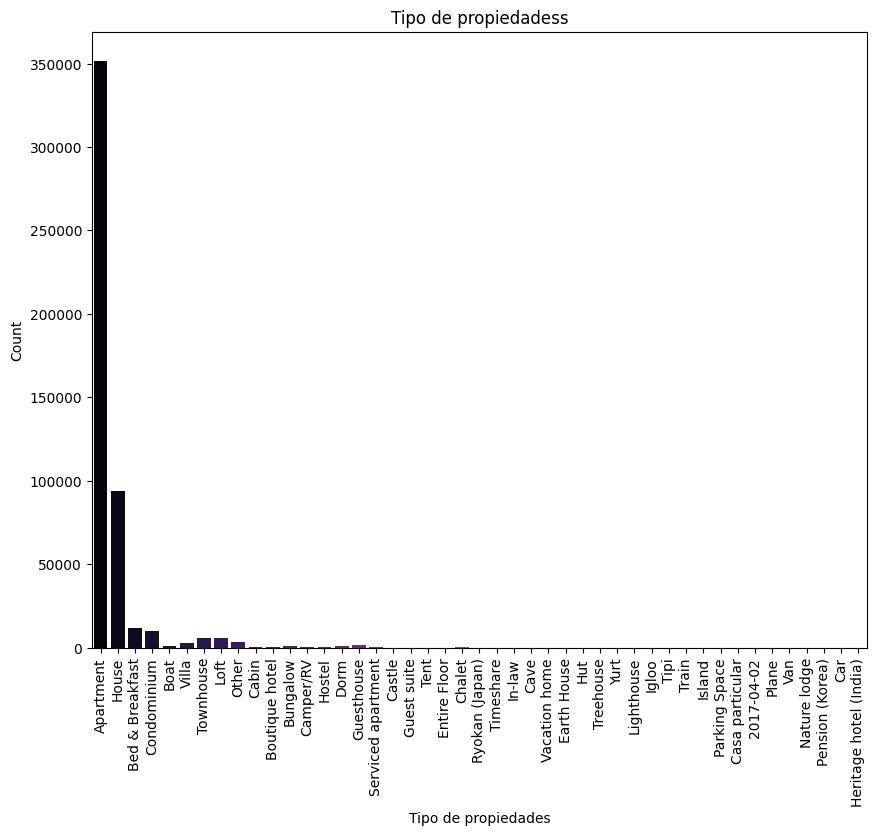

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Property Type', palette='magma')
plt.xticks(rotation=90)
plt.title('Tipo de propiedadess')
plt.xlabel('Tipo de propiedades')
plt.ylabel('Count')
plt.show()

Analisamos el tipo de alquiler, si es por toda la propiedad, solo un cuarto privado o un cuarto compartido.

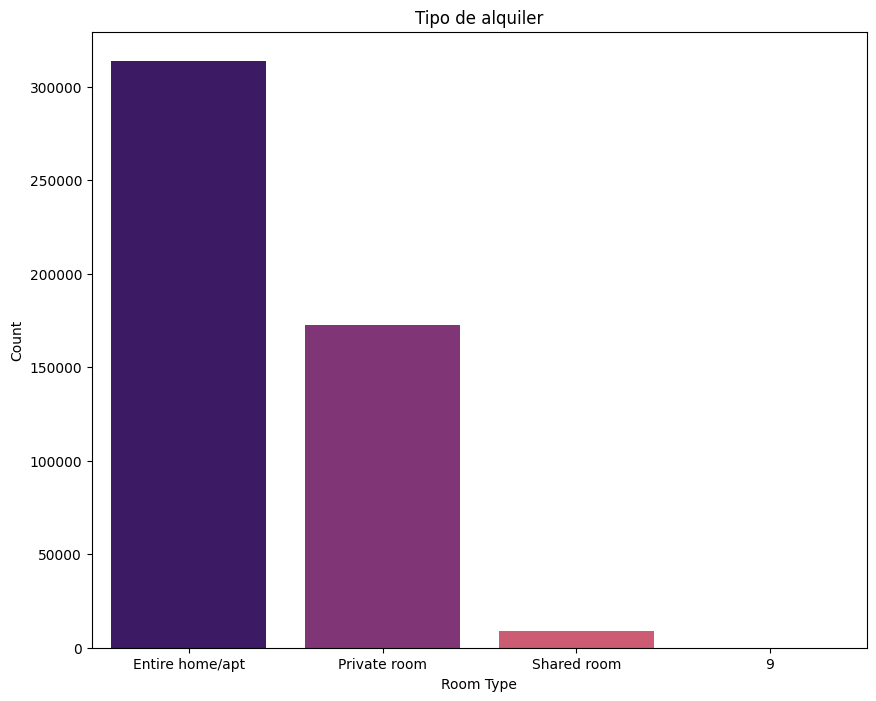

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Room Type', palette='magma')
plt.title('Tipo de alquiler')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

Analisamos el tipo de cuarto

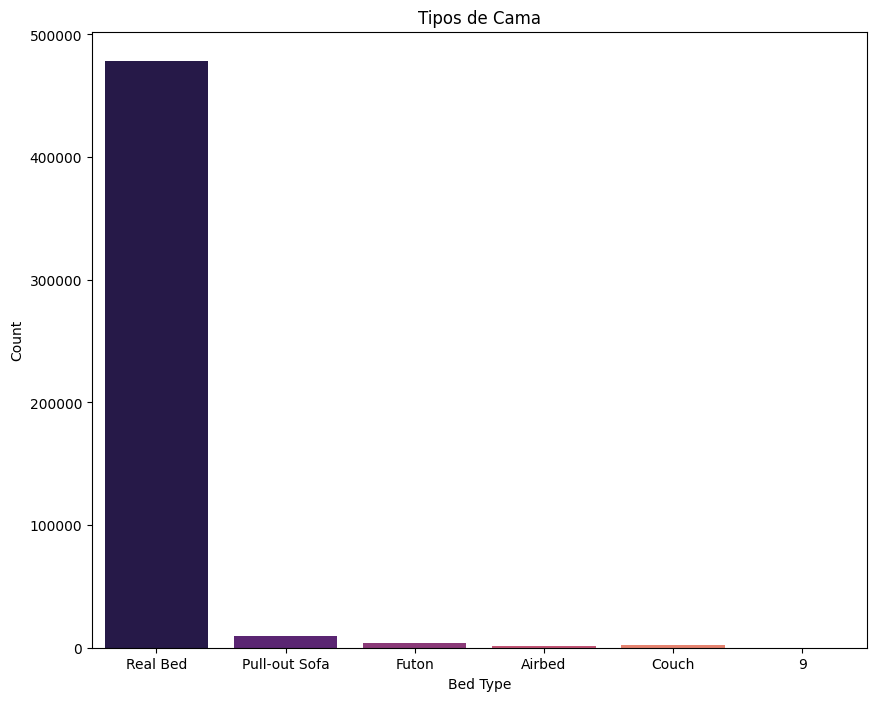

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='Bed Type', palette='magma')
plt.title('Tipos de Cama')
plt.xlabel('Bed Type')
plt.ylabel('Count')
plt.show()

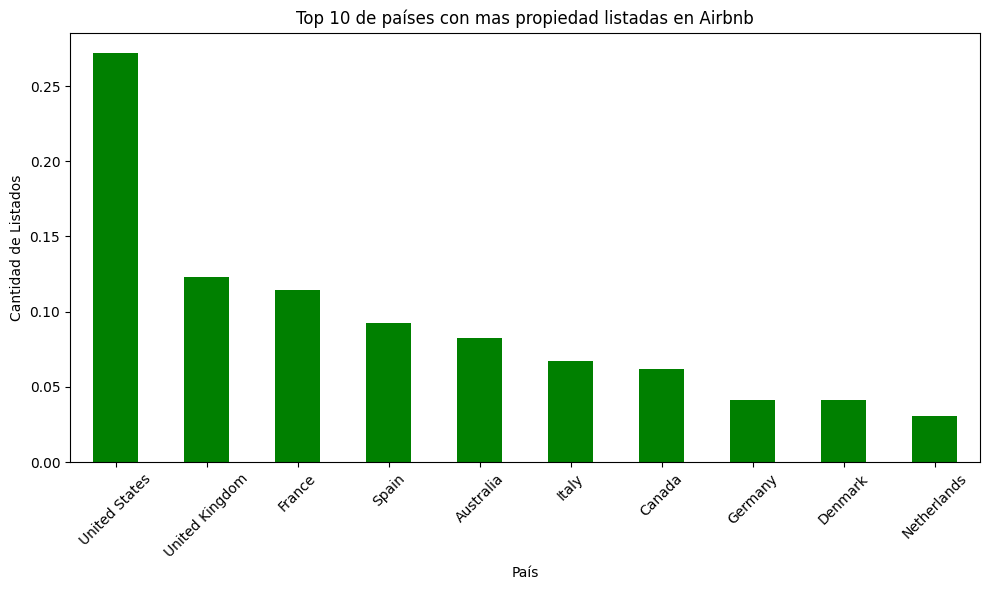

In [ ]:
conteo_paises = df['Country'].value_counts(10).head(10)


plt.figure(figsize=(10, 6))

conteo_paises.plot(kind='bar', color='green')

plt.xlabel('País')
plt.ylabel('Cantidad de Listados')
plt.title('Top 10 de países con mas propiedad listadas en Airbnb')

plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


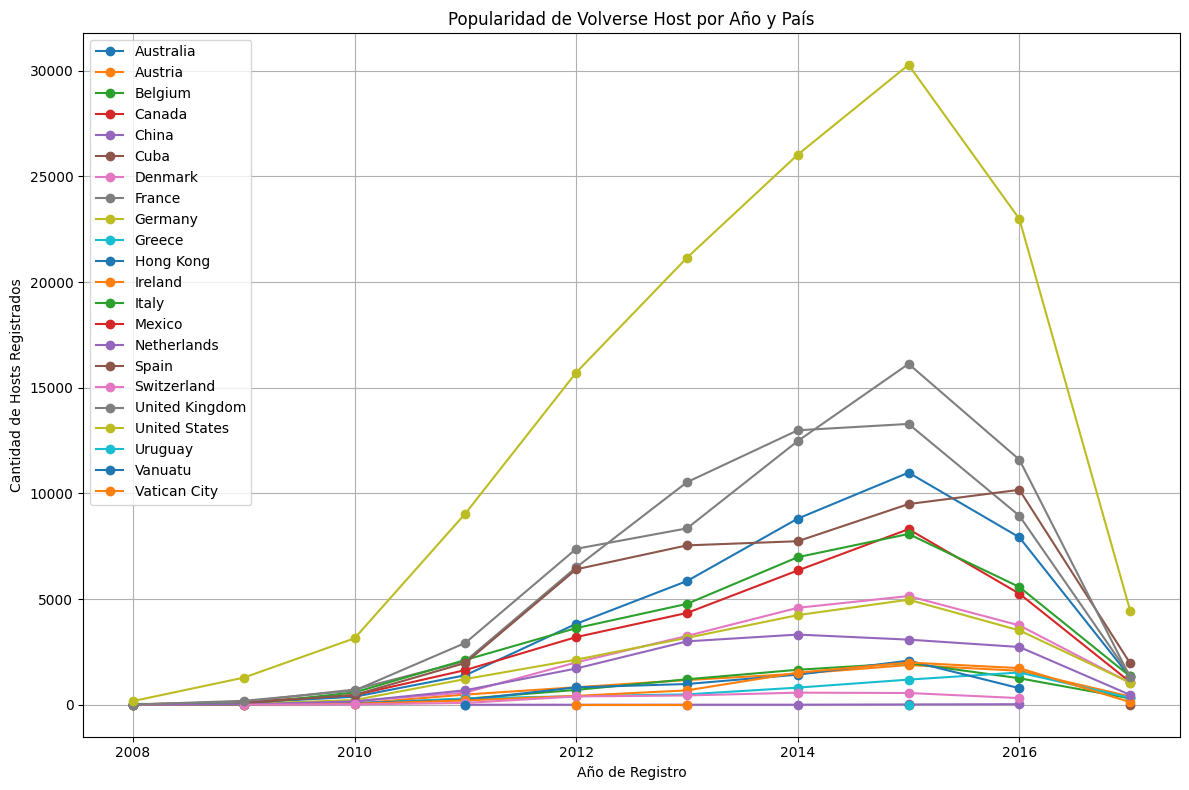

In [ ]:
# Convertimos 'Host Since' a formato de fecha
df['Host Since'] = pd.to_datetime(df['Host Since'])

# Extraemos el año de registro
df['Año de Registro'] = df['Host Since'].dt.year

# Contamos la cantidad de hosts registrados x año y pais
conteo_paises_por_año = df.groupby(['Country', 'Año de Registro'])['Host ID'].count().reset_index()


plt.figure(figsize=(12, 8))
for pais in conteo_paises_por_año['Country'].unique():
    data_pais = conteo_paises_por_año[conteo_paises_por_año['Country'] == pais]
    plt.plot(data_pais['Año de Registro'], data_pais['Host ID'], label=pais, marker='o', linestyle='-')

plt.xlabel('Año de Registro')
plt.ylabel('Cantidad de Hosts Registrados')
plt.title('Popularidad de Volverse Host por Año y País')

plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

En este grafico podemos ver las variaciones de popularidad por país de Inscribir Hosts en Airbnb, en rangos generales podemos ver un aumento sostenido hasta el 2015 donde existe un pick de propiedades inscriptas y luego una disminución sostenida.

In [ ]:
df['Host Since'] = pd.to_datetime(df['Host Since'])

df['Año de Registro'] = df['Host Since'].dt.year

conteo_por_año = df['Año de Registro'].value_counts().sort_index()

conteo_por_año_df = pd.DataFrame({'Año de Registro': conteo_por_año.index, 'Cantidad Total de Hosts Registrados': conteo_por_año.values})


print(conteo_por_año_df)

   Año de Registro  Cantidad Total de Hosts Registrados
0           2008.0                                  268
1           2009.0                                 2050
2           2010.0                                 7257
3           2011.0                                25241
4           2012.0                                56081
5           2013.0                                76924
6           2014.0                               100967
7           2015.0                               119450
8           2016.0                                89691
9           2017.0                                16516


Efectivamente podemos ver que el pico de inscripciones totales fue en 2015, posteriormente fue reduciendose a niveles globales. la base llega hasta el 2017

Este grafico nos muestra un grafico de barras en el cual podemos ver los 10 paisese con mayor cantidad de propiedades listadas en Airbnb. en el cual podemos ver que EE.UU. Es donde es más comun y popular este sistema de alquileres.

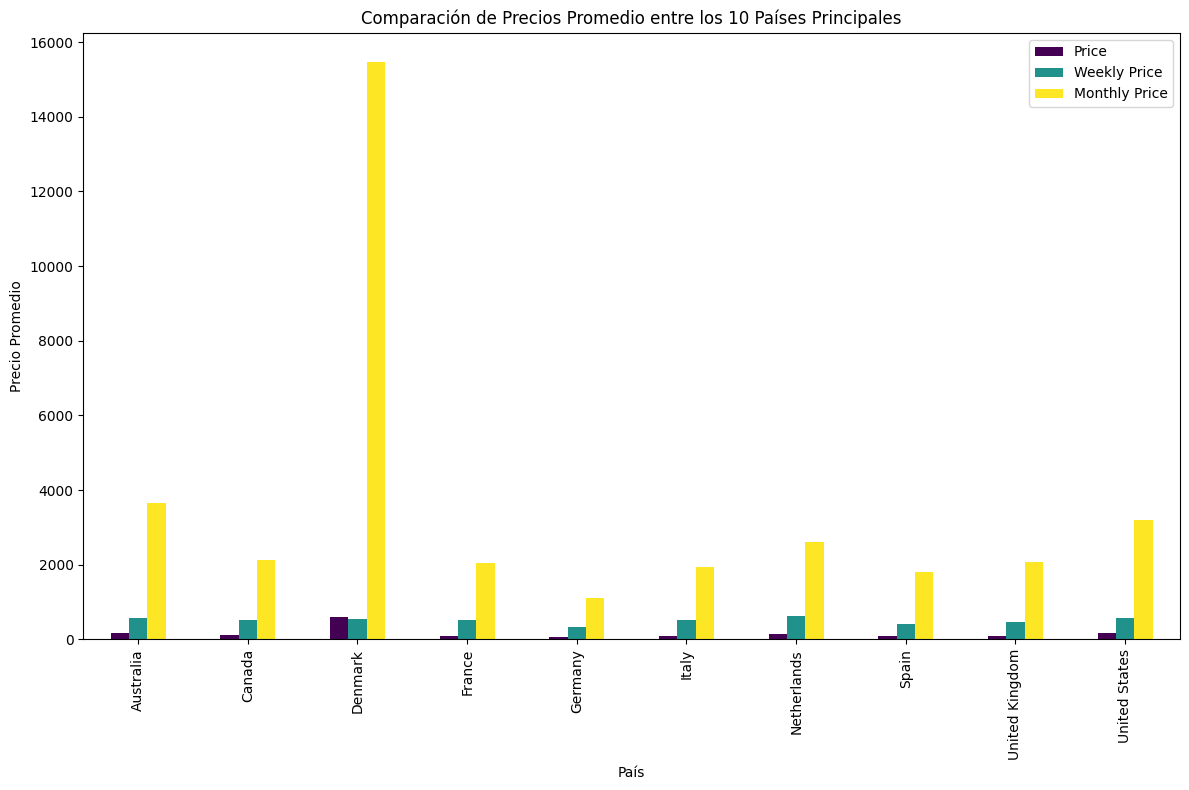

In [ ]:
top_10_paises = df['Country'].value_counts().head(10).index


df_top_10_paises = df[df['Country'].isin(top_10_paises)]
#"Calculamos los promedios de precios x país
promedio_precios = df_top_10_paises.groupby('Country')[['Price', 'Weekly Price', 'Monthly Price']].mean()

promedio_precios.plot(kind='bar', figsize=(12, 8), colormap='viridis')

plt.xlabel('País')
plt.ylabel('Precio Promedio')
plt.title('Comparación de Precios Promedio entre los 10 Países Principales')

plt.tight_layout()
plt.show()

En este Grafico de barras comparamos los promedios de los precios semananles, mensuales y diarios. pdemos ver que lso precios Semanales son parecidos en los principales países, pero por otro lado los precios mensuales y diarios presentan un gran incremento en Dinamarca, Manteniendose parecidos en el resto de los paises.

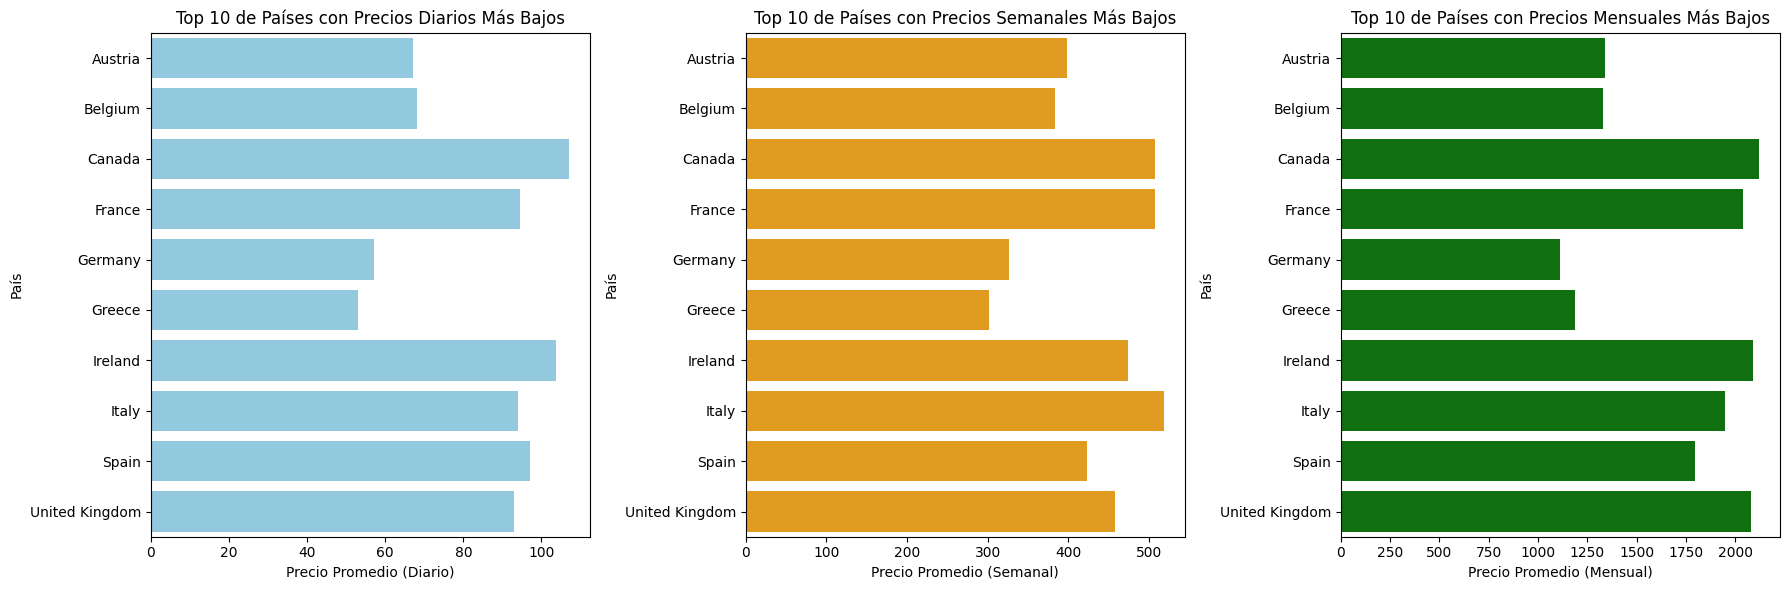

In [ ]:
# Filtramos lso datos por nuestra columnas 'Price', 'Weekly Price' y 'Monthly Price'
df = df.dropna(subset=['Price', 'Weekly Price', 'Monthly Price'])

# calculamos los 10 países con los precios promedio más bajos
top_10_paises_diario = df.groupby('Country')['Price'].mean().nsmallest(10).index
top_10_paises_semanal = df.groupby('Country')['Weekly Price'].mean().nsmallest(10).index
top_10_paises_mensual = df.groupby('Country')['Monthly Price'].mean().nsmallest(10).index

# Filtrarmos el DataFrame originalcon solo los top10
df_top_10_diario = df[df['Country'].isin(top_10_paises_diario)]
df_top_10_semanal = df[df['Country'].isin(top_10_paises_semanal)]
df_top_10_mensual = df[df['Country'].isin(top_10_paises_mensual)]

# Calcularmos los precios x país
promedio_diario = df_top_10_diario.groupby('Country')['Price'].mean().reset_index()
promedio_semanal = df_top_10_semanal.groupby('Country')['Weekly Price'].mean().reset_index()
promedio_mensual = df_top_10_mensual.groupby('Country')['Monthly Price'].mean().reset_index()

# Excluimos países con menos de 2 caracteres en el nombre
df_top_10_diario = df_top_10_diario[df_top_10_diario['Country'].str.len() >= 2]
df_top_10_semanal = df_top_10_semanal[df_top_10_semanal['Country'].str.len() >= 2]
df_top_10_mensual = df_top_10_mensual[df_top_10_mensual['Country'].str.len() >= 2]

# Crearmos una figura con 3 subplots en una fila
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 'Price'(Diario)
sns.barplot(x='Price', y='Country', data=promedio_diario, color='skyblue', label='Precio Diario', ax=axes[0])
axes[0].set_xlabel('Precio Promedio (Diario)')
axes[0].set_ylabel('País')
axes[0].set_title('Top 10 de Países con Precios Diarios Más Bajos')

#  'Weekly Price'
sns.barplot(x='Weekly Price', y='Country', data=promedio_semanal, color='orange', label='Precio Semanal', ax=axes[1])
axes[1].set_xlabel('Precio Promedio (Semanal)')
axes[1].set_ylabel('País')
axes[1].set_title('Top 10 de Países con Precios Semanales Más Bajos')

#  'Monthly Price'
sns.barplot(x='Monthly Price', y='Country', data=promedio_mensual, color='green', label='Precio Mensual', ax=axes[2])
axes[2].set_xlabel('Precio Promedio (Mensual)')
axes[2].set_ylabel('País')
axes[2].set_title('Top 10 de Países con Precios Mensuales Más Bajos')


plt.tight_layout()


plt.show()

en este grafico de barras comparamos los precios promedios más bajos y podemos ver que los precios semanales y mensuales se mantienen en un nivel parejo, mientras que los preción diarios tienen una mayor dispersion, teniendo a mexico entre los más bajos.

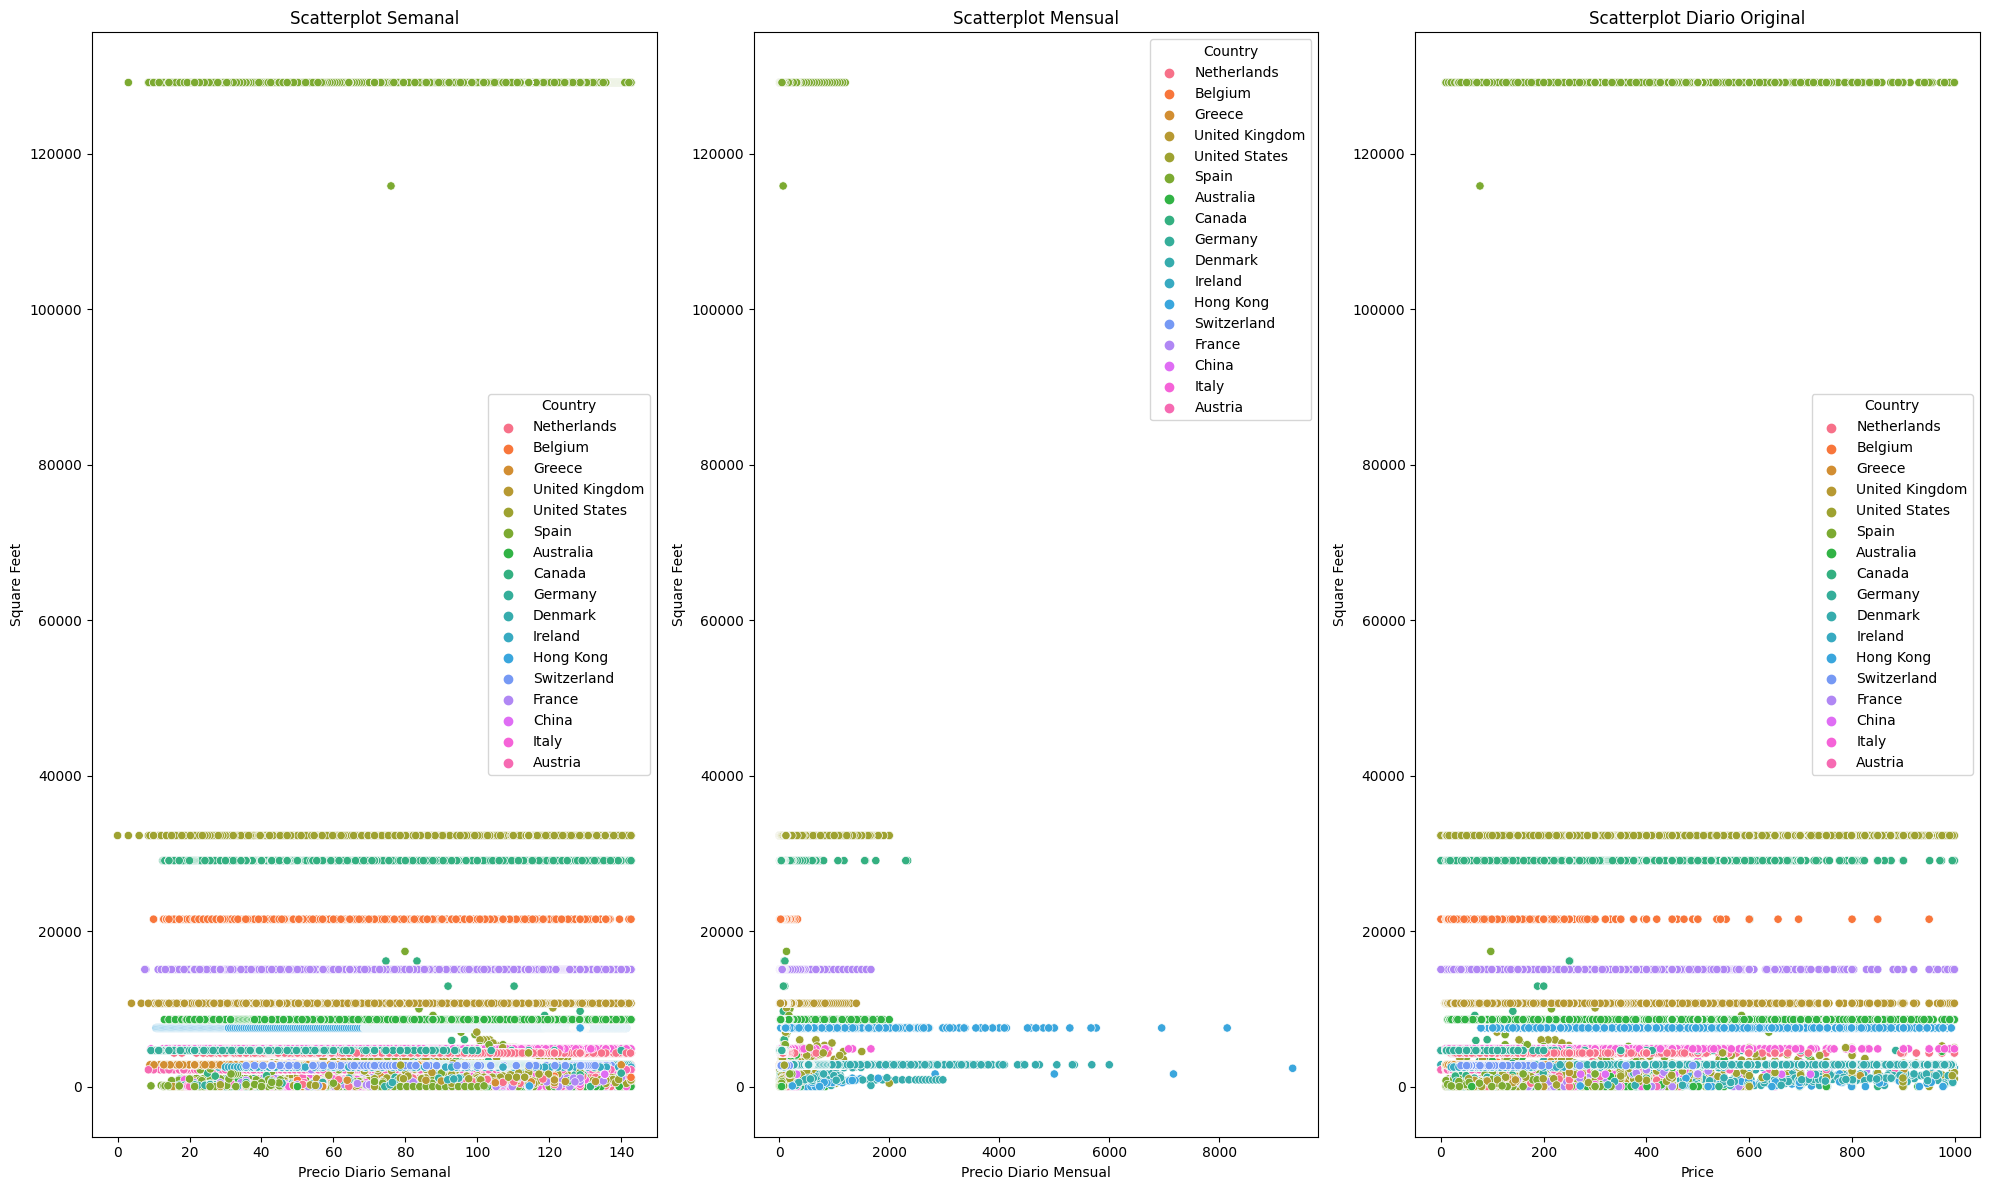

In [ ]:



df = df.dropna(subset=['Square Feet', 'Weekly Price', 'Monthly Price'])


df['Precio Diario Semanal'] = (df['Weekly Price'] / 7)
df['Precio Diario Mensual'] = (df['Monthly Price'] / 30)


plt.figure(figsize=(20, 12))

# Semanal
plt.subplot(1, 3, 1)
sns.scatterplot(x='Precio Diario Semanal', y='Square Feet', hue='Country', data=df)
plt.title('Scatterplot Semanal')

# Mensual
plt.subplot(1, 3, 2)
sns.scatterplot(x='Precio Diario Mensual', y='Square Feet', hue='Country', data=df)
plt.title('Scatterplot Mensual')

# Diario
plt.subplot(1, 3, 3)
sns.scatterplot(x='Price', y='Square Feet', hue='Country', data=df)
plt.title('Scatterplot Diario Original')

plt.tight_layout()
plt.show()


En estos tres graficos comparamos los precios diariosa en las 3 modalidades de cobro, precio diario, precio mensual y precio semanal todo esto por metro cuadrado. Podemos ver que es igualmente conveniente, pero más en modalidad mensual alquilar casas de mayor tamaño. sin embargo las de menor tamaño se vuelven caras con relación al espacio.


Text(0.5, 1.0, 'Top 10 de Países con Más Superficie alquilada en Airbnb')

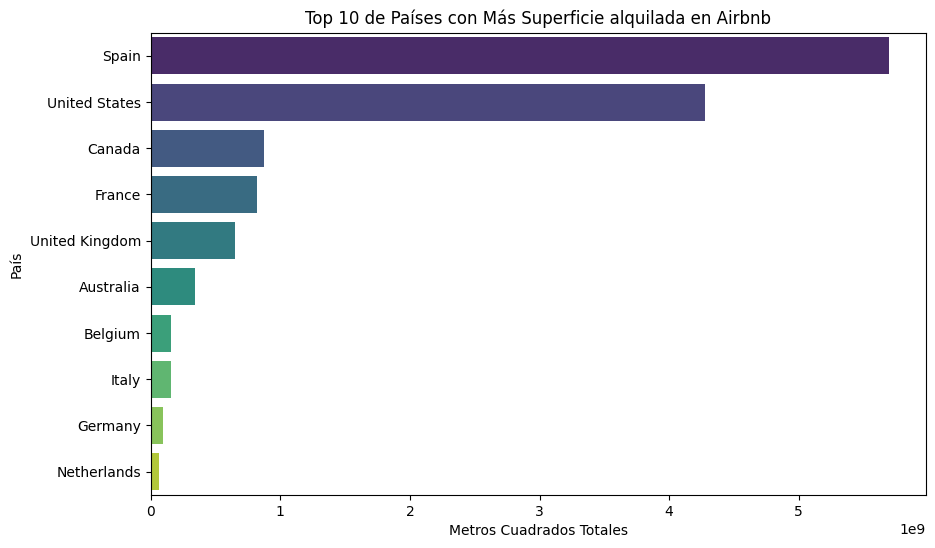

In [ ]:
df = df.dropna(subset=['Square Feet'])


metros_cuadrados_por_pais = df.groupby('Country')['Square Feet'].sum().reset_index()


top_paises_metros_cuadrados = metros_cuadrados_por_pais.nlargest(10, 'Square Feet')


plt.figure(figsize=(10, 6))
sns.barplot(x='Square Feet', y='Country', data=top_paises_metros_cuadrados, palette='viridis')
plt.xlabel('Metros Cuadrados Totales')
plt.ylabel('País')
plt.title('Top 10 de Países con Más Superficie alquilada en Airbnb')

En este grafico podemos ver los paises que tienen mayor cantidad de metros cuadrados alquilados. Podemos ver que es consecuente con relación al grafico que muestra la mayor cantidad de hospedajes.

##  E.D.A

###  Procesamiento de outliers
-En la columna square feet podemos a travez del analisis de z-Score podemos ver que nos marca como que existen mayores outliers  

In [ ]:


# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=[float, int])

# Calcular los z-scores
z_scores = stats.zscore(columnas_numericas)
outliers = (z_scores > 3) | (z_scores < -3)
# Contar valores atípicos por columna
cantidad_atipicos_por_columna = outliers.sum(axis=0)

columnas_ordenadas_por_atipicos = cantidad_atipicos_por_columna.sort_values(ascending=False)
max_z_scores = z_scores.max(axis=0)
columnas_con_mayores_atipicos = columnas_numericas.columns[max_z_scores.argmax()]

# Imprimir las columnas con los mayores valores atípicos
print("Columnas con los mayores valores atípicos:")
print(columnas_con_mayores_atipicos)

Columnas con los mayores valores atípicos:
Minimum Nights


In [ ]:
# Calcular el IQR y los límites
Q1 = df['Square Feet'].quantile(0.25)
Q3 = df['Square Feet'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Agregar la columna 'Outlier_IQR' al DataFrame
df['Outlier_IQR'] = np.where((df['Square Feet'] < limite_inferior) | (df['Square Feet'] > limite_superior), 1, 0)

# Contar los valores atípicos identificados
conteo_atipicos = df['Outlier_IQR'].value_counts()

# Mostrar el conteo de valores atípicos
print(conteo_atipicos)

# Porcentaje de outliers
porcentaje_outliers = (df['Outlier_IQR'].sum() / len(df)) * 100

print(f'Porcentaje de outliers en Square Feet: {porcentaje_outliers:.2f}%')

0    450680
1     44075
Name: Outlier_IQR, dtype: int64
Porcentaje de outliers en Square Feet: 8.91%


In [ ]:
Q1 = df['Monthly Price'].quantile(0.25)
Q3 = df['Monthly Price'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Agregar la columna 'Outlier_IQR' al DataFrame
df['MonthlyPriceOutlier_IQR'] = np.where((df['Monthly Price'] < limite_inferior) | (df['Monthly Price'] > limite_superior), 1, 0)

# Contar los valores atípicos identificados
conteo_atipicos = df['MonthlyPriceOutlier_IQR'].value_counts()

# Mostrar el conteo de valores atípicos
print(conteo_atipicos)

# Porcentaje de outliers
porcentaje_outliers = (df['MonthlyPriceOutlier_IQR'].sum() / len(df)) * 100

print(f'Porcentaje de outliers en Monthly Price: {porcentaje_outliers:.2f}%')

0    448105
1     46650
Name: MonthlyPriceOutlier_IQR, dtype: int64
Porcentaje de outliers en Monthly Price: 9.43%


*texto en cursiva*### Variable Target: Price


#### Medidas de tendencia central

In [ ]:
import scipy


Nos vamos a enfocar en la variable Price Para poder preveer los distintos valores

> Bloque con sangría



In [ ]:
variable_target = df['Price']
variable_target.describe()

count    494755.000000
mean        143.125424
std         156.864430
min           0.000000
25%          55.000000
50%          90.000000
75%         150.000000
max         999.000000
Name: Price, dtype: float64

In [ ]:
scipy.stats.describe(variable_target)

DescribeResult(nobs=448105, minmax=(0.0, 999.0), mean=114.20969290785906, variance=11146.001630975456, skewness=3.3423814574007973, kurtosis=16.021185608378293)

In [ ]:
# Media geometrica
scipy.stats.gmean(variable_target)


0.0

In [ ]:
# Media recortada
scipy.stats.trim_mean(variable_target, 0.1)

94.43434918243905

In [ ]:
# Moda
scipy.stats.mode(variable_target)

ModeResult(mode=50.0, count=16738)

In [ ]:
# Mediana
(variable_target).median()

85.0

Text(0.5, 1.0, 'Distribución de Price')

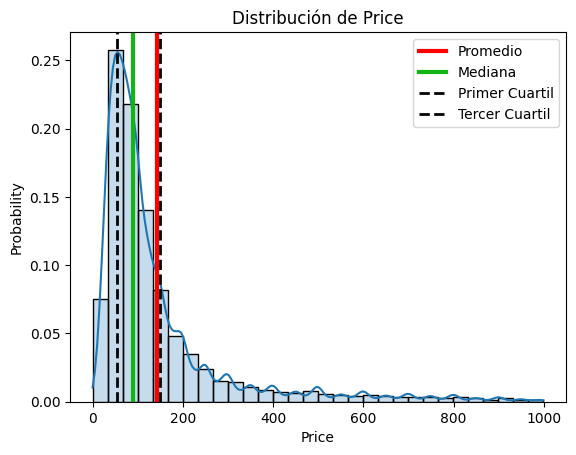

In [ ]:
# Histograma variable target
# Primero calculo algunas medidas que quiero presentar
media = variable_target.mean()
mediana = variable_target.median()
primer_cuartil = variable_target.quantile(0.25)
tercer_cuartil = variable_target.quantile(0.75)

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'Price',
             bins = 30,
             alpha = 0.25,
             kde = True,
             stat='probability')
# Agrego linea de promedio
plt.axvline(x = media,
            color = 'red',
            linestyle = '-',
            label = 'Promedio',
            linewidth = 3)
# Agrego linea de mediana
plt.axvline(x = mediana,
            color = '#11B613',
            linestyle = '-',
            label = 'Mediana',
            linewidth = 3)
# Agrego linea de primer cuartil
plt.axvline(x = primer_cuartil,
            color = 'black',
            linestyle = '--',
            label = 'Primer Cuartil',
            linewidth = 2)
# Agrego linea de tercer cuartil
plt.axvline(x = tercer_cuartil,
            color = 'black',
            linestyle = '--',
            label = 'Tercer Cuartil',
            linewidth = 2)
plt.legend()

plt.title('Distribución de Price')

#### Analisis
Distribución Asimétrica Positiva: En estadísticas, una distribución asimétrica positiva, también conocida como asimetría positiva o cola derecha, significa que la mayoría de los valores se agrupan en la parte izquierda de la distribución, mientras que hay relativamente pocos valores en la parte derecha

Analisamos el Logaritmo para revisar de la variable para minimizar el impacto de los valores altos.


#### Medidas de dispersión

In [ ]:
# Varianza
variable_target.var()

11146.001630975456

In [ ]:
# Desvio muestral
np.std(variable_target, ddof=1)

105.57462588603123

In [ ]:
# Desvio poblacional
np.std(variable_target, ddof=0)

105.57450808475163

In [ ]:
# Coeficiente de variación
scipy.stats.variation(variable_target)

0.9243918392279188

In [ ]:
# Rango intercuartílico
scipy.stats.iqr(variable_target)

82.0

In [ ]:
# Error estándar
scipy.stats.sem(variable_target)

0.15771378559700805

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Distribución de Price transformado a Logaritmo')

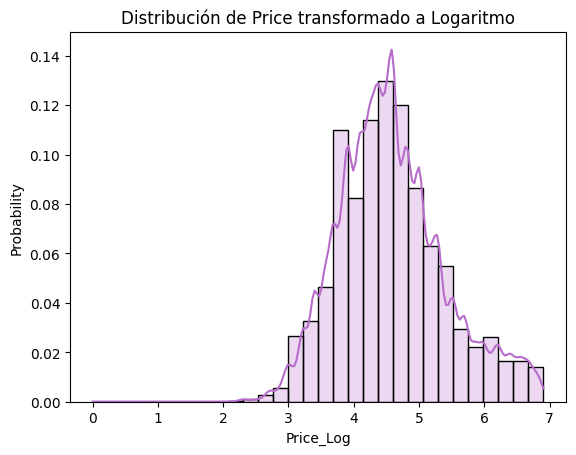

In [ ]:
# Primero genero la variable logaritmica
df['Price_Log'] = np.log(df['Price'])
# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'Price_Log',
             bins = 30,
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#B76BCB')
plt.title('Distribución de Price transformado a Logaritmo')

### Analisis
Sigue existiendo una tendencia a que se traslade a la derecha, si bien tiende a mas normalidad. Es probabvle que la dispersion ente los outliners superiores e inferiores sea muy grande

### Correlación

Como nuestra variable Target es Numerica veremos que relacion tiene con el resto de las variables numericas de este analisis.

In [ ]:
# Calculo matriz de correlación
matriz_correlacion = df.corr(method='pearson', numeric_only=True)
# Selecciono a la variable target para estudiar únicamente correlación con ella
matriz_correlacion_target = matriz_correlacion['Price_Log']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación
columnas_a_excluir = ['Price', 'Price_Log']
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

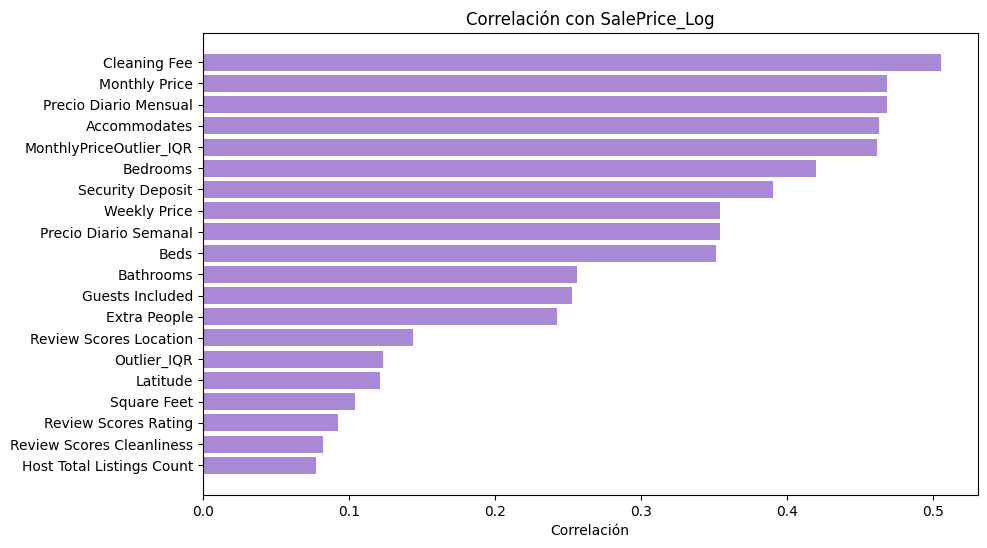

In [ ]:
# Grafico el top 20 de variables más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:20]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index,
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con SalePrice_Log')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

#### Analisamos la Variable Bedrooms

Text(0.5, 1.0, 'Relación entre Logaritmo del Price y Bedrooms')

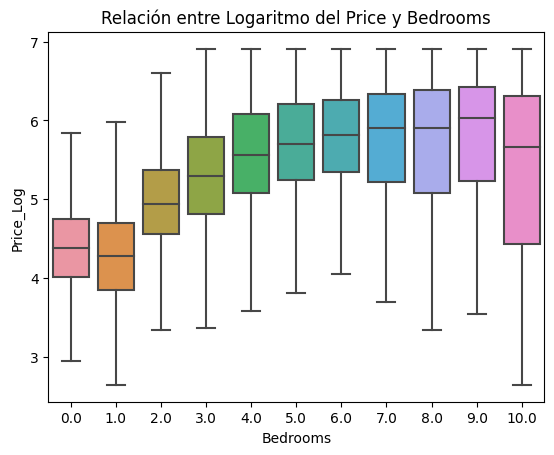

In [ ]:
plt.figure()
sns.boxplot(data = df,
            x = 'Bedrooms',
            y = 'Price_Log',
            showfliers = False)
plt.title('Relación entre Logaritmo del Price y Bedrooms')

No seria un buen predictor para relacionar con nuestra variable Objetivo ya que se mantiene estable en la parte baja y no tiene un crecimiento uniforme.

#### Analisis de cantidad de Propiedades por Pais

Analisamos si a mayor cantidad de propiedades listadas en Airbnb mas Intermedio es el valor de alquiler de las mismas analisando como unidad los paises. Para esto hacemos un analisis univariado.


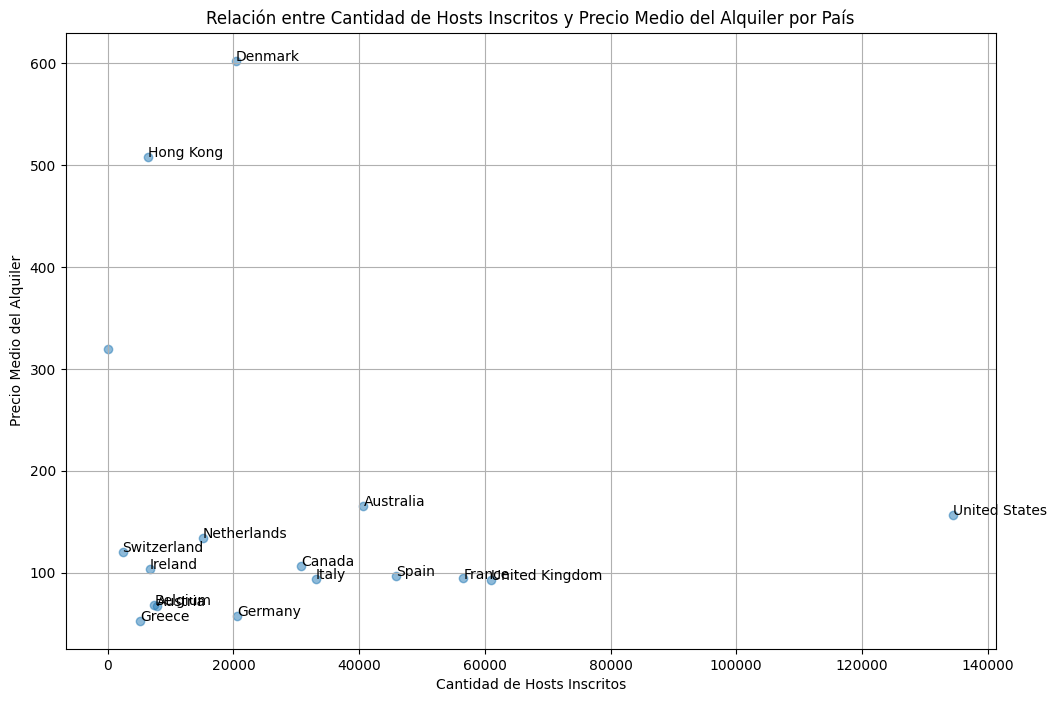

In [ ]:


# Agrupar por país y calcular la cantidad de hosts inscritos y el precio medio del alquiler
grupo_pais = df.groupby('Country')
cantidad_hosts = grupo_pais['Host ID'].count()
precio_medio_alquiler = grupo_pais['Price'].mean()

# Crear un DataFrame con los datos
datos = pd.DataFrame({'Cantidad de Hosts Inscritos': cantidad_hosts, 'Precio Medio del Alquiler': precio_medio_alquiler})

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
plt.scatter(datos['Cantidad de Hosts Inscritos'], datos['Precio Medio del Alquiler'], alpha=0.5)
plt.xlabel('Cantidad de Hosts Inscritos')
plt.ylabel('Precio Medio del Alquiler')
plt.title('Relación entre Cantidad de Hosts Inscritos y Precio Medio del Alquiler por País')

# Etiquetar algunos puntos con nombres de países (opcional)
for i, row in datos.iterrows():
    if row['Cantidad de Hosts Inscritos'] > 1000:  # Puedes ajustar este umbral según tus datos
        plt.annotate(i, (row['Cantidad de Hosts Inscritos'], row['Precio Medio del Alquiler']))

plt.grid(True)
plt.show()

In [ ]:
model1 = 'precio_medio_alquiler ~ cantidad_hosts'
lm1 = sm.ols(formula=model1, data=datos).fit()
print(lm1.summary())

                              OLS Regression Results                             
Dep. Variable:     precio_medio_alquiler   R-squared:                       0.020
Model:                               OLS   Adj. R-squared:                 -0.046
Method:                    Least Squares   F-statistic:                    0.3001
Date:                   Wed, 27 Dec 2023   Prob (F-statistic):              0.592
Time:                           01:44:49   Log-Likelihood:                -109.64
No. Observations:                     17   AIC:                             223.3
Df Residuals:                         15   BIC:                             224.9
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept     

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Regresion Lineal Simple Cantidad de Hosts por país/ precio Promedio de alquiler

R-cuadrado (R-squared): El R-cuadrado es muy bajo, cerca de cero,por lo que la cantidad de hosts inscritos no parece ser un predictor significativo del precio medio del alquiler.

Coeficientes: El coeficiente de la cantidad de hosts inscritos es muy cercano a cero y p es muy alto (0.927). Esto sugiere que no hay una relación significativa entre la cantidad de hosts inscritos y el precio medio del alquiler.

Los resultados de la regresión indican que no existe una relación significativa entre la cantidad de hosts inscritos y el precio medio del alquiler en este conjunto de datos.

### Vemos los precios  Marginales por día

Analisamos Contrastamos si existe conveniencia en alquilar más días en cuanto al costo marginal de los días..


<ipython-input-49-7e055625a522>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precios_df['Weekly Price'] /= 7
<ipython-input-49-7e055625a522>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precios_df['Monthly Price'] /= 30


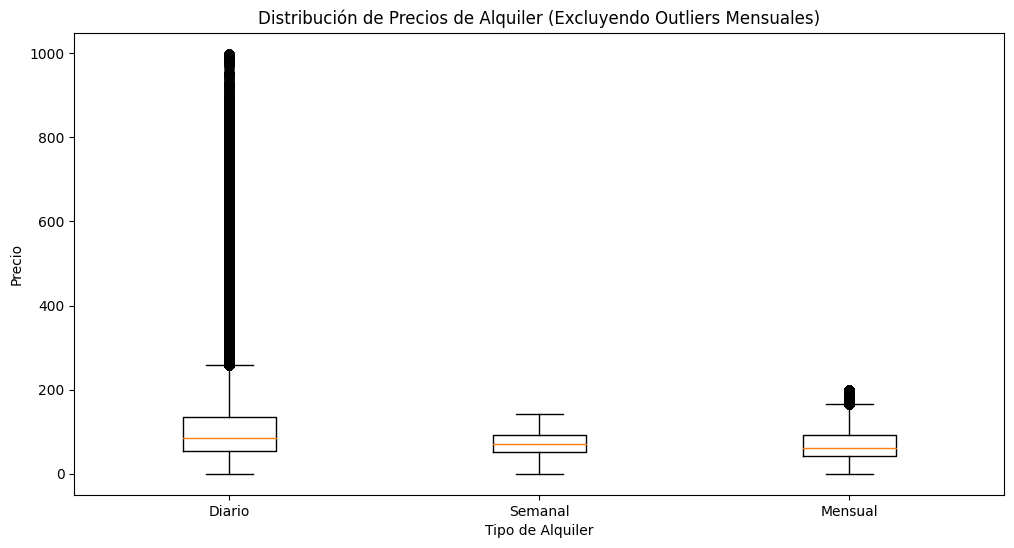

In [ ]:


df = df.dropna(subset=['Price', 'Weekly Price', 'Monthly Price'])

# Filtrar los valores con MonthlyPriceOutlier_IQR igual a 0 (sin outliers)
df = df[df['MonthlyPriceOutlier_IQR'] == 0]

# Crear un DataFrame solo con las columnas de precios
precios_df = df[['Price', 'Weekly Price', 'Monthly Price']]

# Dividir los precios semanales y mensuales por 7 y 30, respectivamente
precios_df['Weekly Price'] /= 7
precios_df['Monthly Price'] /= 30

# Crear el gráfico de boxplots
plt.figure(figsize=(12, 6))
plt.boxplot([precios_df['Price'], precios_df['Weekly Price'], precios_df['Monthly Price']], labels=['Diario', 'Semanal', 'Mensual'])
plt.xlabel('Tipo de Alquiler')
plt.ylabel('Precio')
plt.title('Distribución de Precios de Alquiler (Excluyendo Outliers Mensuales)')
plt.show()

In [ ]:
model2 = 'Price ~ Q("Weekly Price") + Q("Monthly Price")'
lm2 = sm.ols(formula=model2, data=precios_df).fit()
print(lm2.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                 2.585e+04
Date:                Wed, 27 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:44:51   Log-Likelihood:            -2.6993e+06
No. Observations:              448105   AIC:                         5.399e+06
Df Residuals:                  448102   BIC:                         5.399e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             33.2321      0

#### Regresion Lineal Multiple
Como era evidente en el grafico R-squared (R²): El valor de R² es 0.953, lo que indica que el modelo explica aproximadamente el 95.3% de la variabilidad en la variable objetivo
P-value (P>|t|): Los valores de p para ambos coeficientes son muy bajos  lo que sugiere que se encuentran muy relacionados. Por lo tanto se demuestra que si bien hay un ahorro en la comparacion de el alquiler diario con el mensual, el ahorro no se encuentra tan marcado.


# Story Telling

### Introduccion



Durante la última década, Airbnb ha experimentado una transformación fenomenal en el ámbito del alquiler de alojamientos, tanto con fines turísticos como de soluciones habitacionales. Lo que en sus inicios fue una idea para compartir espacios privados ha evolucionado en un gigante global que conecta a millones de viajeros con alojamientos únicos en más de 220 países y regiones.

Este conjunto de datos se sumerge en la vasta cantidad de información generada por Airbnb desde sus inicios, con el objetivo de llevar a cabo un análisis estadístico exhaustivo de los alquileres a nivel global que ofrece la plataforma.



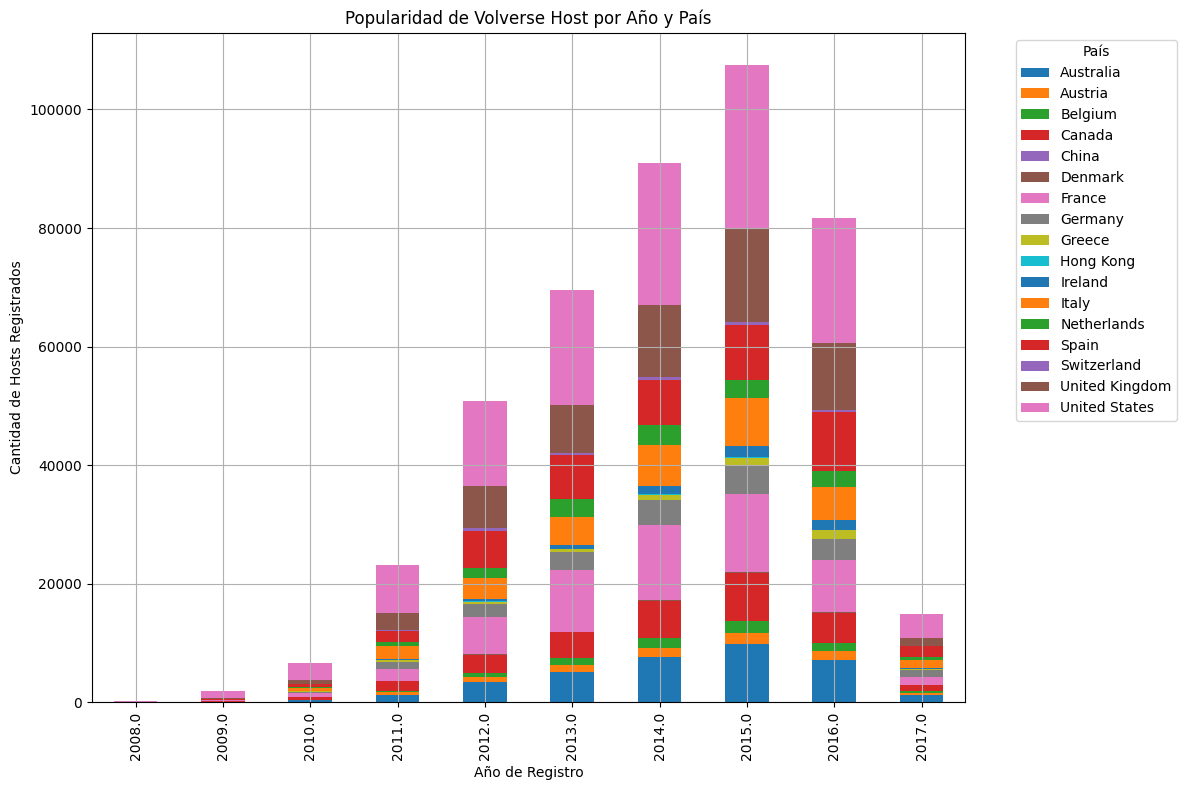

In [ ]:
# Convertir 'Host Since' a formato de fecha
df['Host Since'] = pd.to_datetime(df['Host Since'])

# Extraer el año de registro
df['Año de Registro'] = df['Host Since'].dt.year

# Contar la cantidad de hosts registrados por año y país
conteo_paises_por_año = df.groupby(['Año de Registro', 'Country'])['Host ID'].count().unstack()

# Crear el gráfico de barras apiladas
conteo_paises_por_año.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.xlabel('Año de Registro')
plt.ylabel('Cantidad de Hosts Registrados')
plt.title('Popularidad de Volverse Host por Año y País')

plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.grid(True)
plt.show()

Este gráfico de barras apiladas muestra cómo ha evolucionado el número de anfitriones en la plataforma Airbnb a lo largo de los años, desglosado por países. Cada barra representa un año, y los segmentos apilados en cada barra representan la contribución de cada país al total de anfitriones en ese año.

 Como Objetivo nos encargaremos de poder preveer los precios de distintos inmuebles en alquiler tanto Para alquileres temporarios o fijos mediante el usao de los datos y las disposiciones geograficas


¿La ubicación de la propiedad tiene  o no tiene *impacto* significativo en el precio de alquiler?

¿Qué ripo de alquileres genran más beneficios?

¿Podemos Predecir los precios optimos de alquiler de nuestra propiedad?

¿La política de cancelación seleccionada por el anfitrión afecta la tasa de cancelación de reservas?

Para abordar nuestras interrogantes, procederemos a preparar nuestro conjunto de datos de la siguiente manera. Dado que la totalidad de los datos de Airbnb constituye una base de datos bastante voluminosa, inicialmente examinaremos la presencia de datos duplicados y los valores nulos. En este proceso, eliminaremos las instancias duplicadas para optimizar la eficiencia y la calidad de nuestro conjunto de datos.


Luego de revisar los valores nulos en nuestro conjunto de datos, procederemos a normalizar aquellos que utilizaremos para nuestro análisis. En cuanto a las columnas con un volumen considerable de datos faltantes, optaremos por eliminarlas, ya que no aportarán utilidad significativa a nuestro estudio.

### Precio: ¿Podemos Predecir los precios optimos de alquiler de nuestra propiedad?





Examinamos la variable de precio con el objetivo de comprender su estructura y comportamiento.

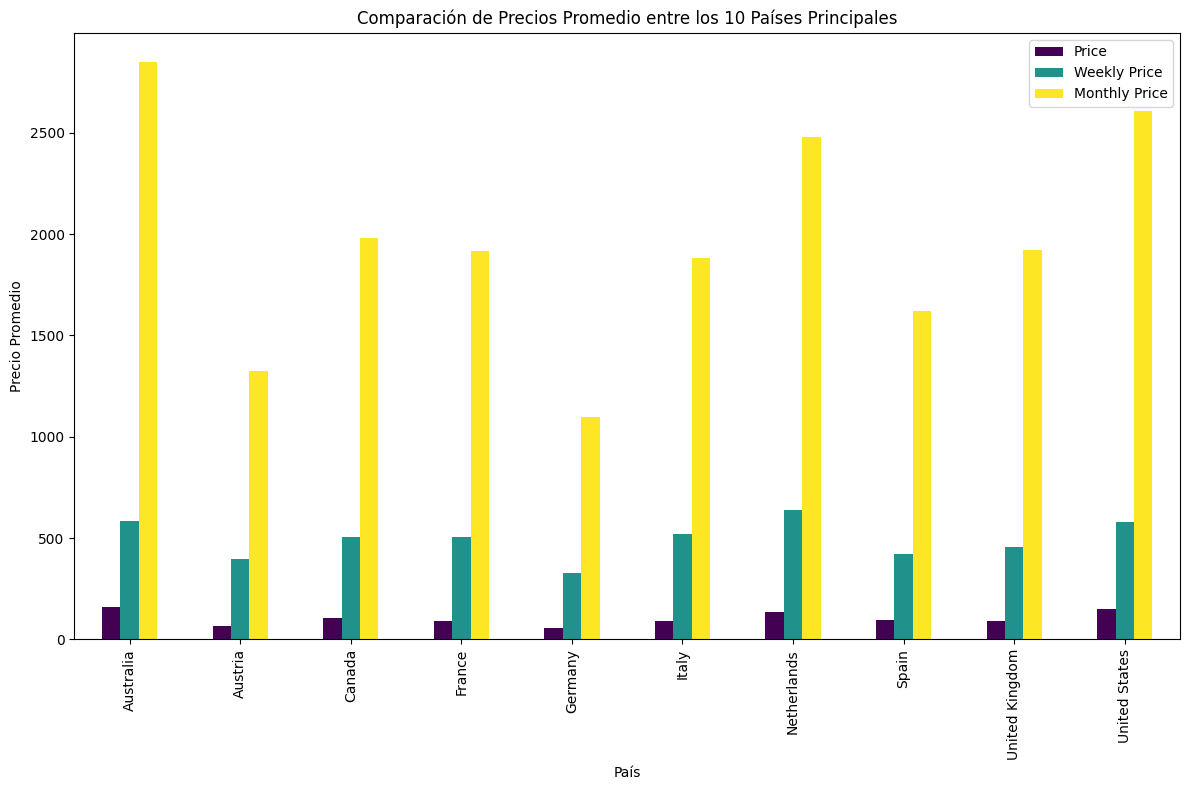

In [ ]:
top_10_paises = df['Country'].value_counts().head(10).index


df_top_10_paises = df[df['Country'].isin(top_10_paises)]
#"Calculamos los promedios de precios x país
promedio_precios = df_top_10_paises.groupby('Country')[['Price', 'Weekly Price', 'Monthly Price']].mean()

promedio_precios.plot(kind='bar', figsize=(12, 8), colormap='viridis')

plt.xlabel('País')
plt.ylabel('Precio Promedio')
plt.title('Comparación de Precios Promedio entre los 10 Países Principales')

plt.tight_layout()
plt.show()




Analizamos los precios promedio en los 10 principales países tanto semanal, diario como mensual. Excluyendo Dinamarca, que presenta una diferencia significativa en los precios mensuales, sugiriendo la posibilidad de algún gravamen, observamos que en la mayoría de los casos los precios se manejan de manera similar.

In [ ]:
variable_target = df['Price']
variable_target.describe()

count    448105.000000
mean        114.209693
std         105.574626
min           0.000000
25%          53.000000
50%          85.000000
75%         135.000000
max         999.000000
Name: Price, dtype: float64

Analisamos si existe una relación entre el precio y la cantidad de habitaciones de la propiedad

Text(0.5, 1.0, 'Relación entre Logaritmo del Price y Bedrooms')

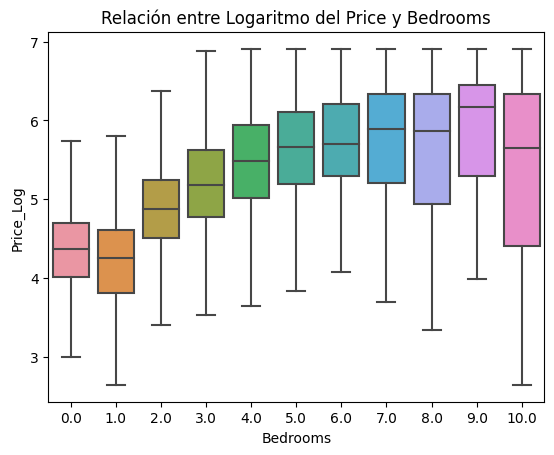

In [ ]:
plt.figure()
sns.boxplot(data = df,
            x = 'Bedrooms',
            y = 'Price_Log',
            showfliers = False)
plt.title('Relación entre Logaritmo del Price y Bedrooms')


La cantidad de habitaciones no resulta relevante para estimar el precio de una propiedad, , ya que no muestra un crecimiento uniforme.







##Analisis de cantidad de Propiedades por Pais


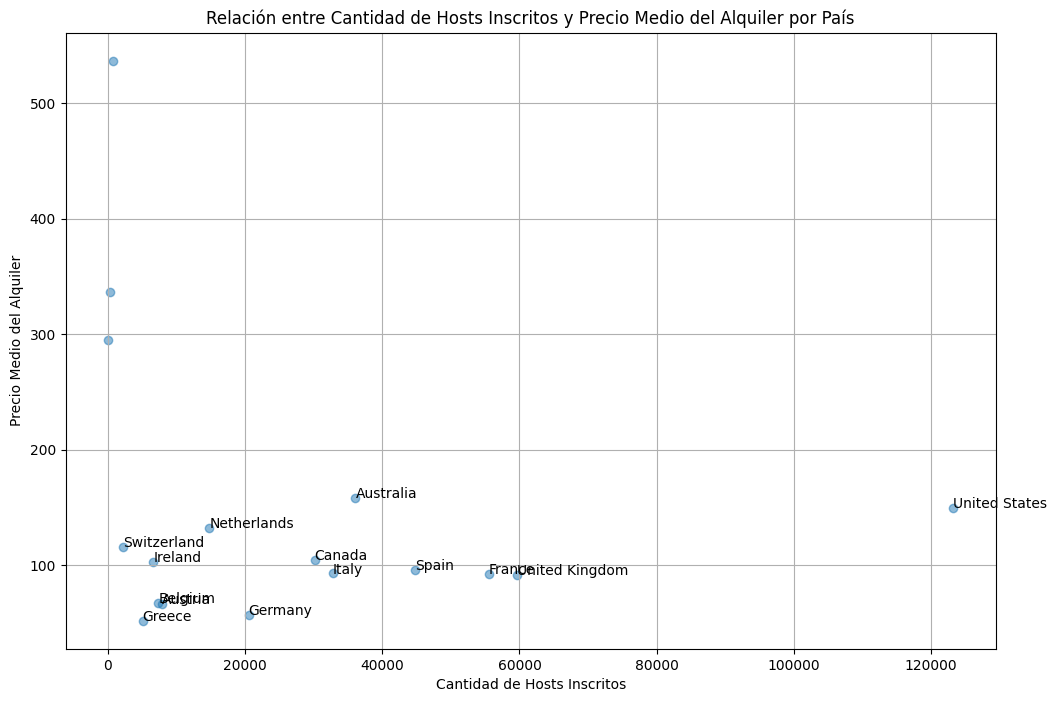

In [ ]:


# Agrupar por país y calcular la cantidad de hosts inscritos y el precio medio del alquiler
grupo_pais = df.groupby('Country')
cantidad_hosts = grupo_pais['Host ID'].count()
precio_medio_alquiler = grupo_pais['Price'].mean()

# Crear un DataFrame con los datos
datos = pd.DataFrame({'Cantidad de Hosts Inscritos': cantidad_hosts, 'Precio Medio del Alquiler': precio_medio_alquiler})

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
plt.scatter(datos['Cantidad de Hosts Inscritos'], datos['Precio Medio del Alquiler'], alpha=0.5)
plt.xlabel('Cantidad de Hosts Inscritos')
plt.ylabel('Precio Medio del Alquiler')
plt.title('Relación entre Cantidad de Hosts Inscritos y Precio Medio del Alquiler por País')

# Etiquetar algunos puntos con nombres de países (opcional)
for i, row in datos.iterrows():
    if row['Cantidad de Hosts Inscritos'] > 1000:  # Puedes ajustar este umbral según tus datos
        plt.annotate(i, (row['Cantidad de Hosts Inscritos'], row['Precio Medio del Alquiler']))

plt.grid(True)
plt.show()

In [ ]:
model1 = 'precio_medio_alquiler ~ cantidad_hosts'
lm1 = sm.ols(formula=model1, data=datos).fit()
print(lm1.summary())

                              OLS Regression Results                             
Dep. Variable:     precio_medio_alquiler   R-squared:                       0.062
Model:                               OLS   Adj. R-squared:                 -0.000
Method:                    Least Squares   F-statistic:                    0.9922
Date:                   Wed, 27 Dec 2023   Prob (F-statistic):              0.335
Time:                           01:44:55   Log-Likelihood:                -105.35
No. Observations:                     17   AIC:                             214.7
Df Residuals:                         15   BIC:                             216.4
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept     

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Regresion Lineal Simple Cantidad de Hosts por país/ precio Promedio de alquiler

R-squared (R^2): El R-cuadrado mide la proporción de la variabilidad en la variable dependiente ('precio_medio_alquiler') que es explicada por las variables independientes en el modelo. En este caso, el R-cuadrado es 0.062, lo que indica que aproximadamente el 6.2% de la variabilidad en el precio medio del alquiler se explica por la variable 'cantidad_hosts'. Un R-cuadrado bajo sugiere que la variable 'cantidad_hosts' por sí sola no explica mucho la variabilidad en el precio.

Coeficientes:

El coeficiente para 'Intercept' es 176.0946. Esto es el valor estimado de 'precio_medio_alquiler' cuando 'cantidad_hosts' es cero.
El coeficiente para 'cantidad_hosts' es -0.0010. Esto indica el cambio estimado en 'precio_medio_alquiler' por cada unidad de cambio en 'cantidad_hosts'. Sin embargo, este coeficiente tiene un p-valor de 0.335, lo que sugiere que no es estadísticamente significativo a un nivel de significancia del 0.05. Por lo tanto, no podemos rechazar la hipótesis nula de que el coeficiente es cero.
P>|t|:

El p-valor asociado con 'cantidad_hosts' es 0.335. Un p-valor alto sugiere que no hay suficiente evidencia para rechazar la hipótesis nula de que el coeficiente de 'cantidad_hosts' es cero.
F-statistic y Prob (F-statistic):

La prueba F evalúa la significancia global del modelo. En este caso, el valor de Prob (F-statistic) es 0.335, lo que sugiere que el modelo en su conjunto puede no ser estadísticamente significativo.
En resumen, según los resultados, la relación entre 'precio_medio_alquiler' y 'cantidad_hosts' no es estadísticamente significativa. Puede ser necesario explorar otras variables o formas más complejas de modelado para capturar la variabilidad en el precio del alquiler de manera más efectiva.

##¿Podemos Predecir los precios optimos de alquiler de nuestra propiedad?




<ipython-input-57-7e055625a522>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precios_df['Weekly Price'] /= 7
<ipython-input-57-7e055625a522>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precios_df['Monthly Price'] /= 30


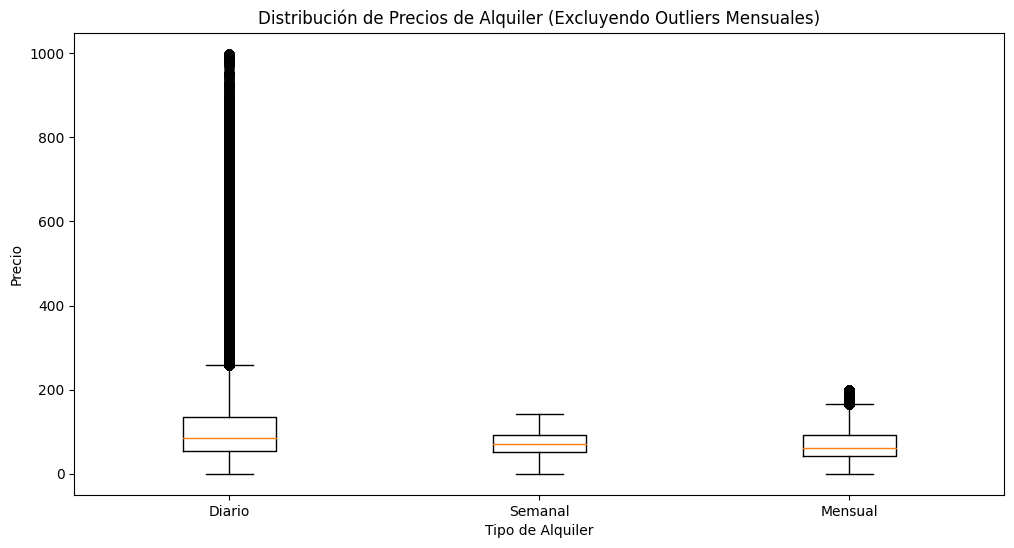

In [ ]:
df = df.dropna(subset=['Price', 'Weekly Price', 'Monthly Price'])

# Filtrar los valores con MonthlyPriceOutlier_IQR igual a 0 (sin outliers)
df = df[df['MonthlyPriceOutlier_IQR'] == 0]

# Crear un DataFrame solo con las columnas de precios
precios_df = df[['Price', 'Weekly Price', 'Monthly Price']]

# Dividir los precios semanales y mensuales por 7 y 30, respectivamente
precios_df['Weekly Price'] /= 7
precios_df['Monthly Price'] /= 30

# Crear el gráfico de boxplots
plt.figure(figsize=(12, 6))
plt.boxplot([precios_df['Price'], precios_df['Weekly Price'], precios_df['Monthly Price']], labels=['Diario', 'Semanal', 'Mensual'])
plt.xlabel('Tipo de Alquiler')
plt.ylabel('Precio')
plt.title('Distribución de Precios de Alquiler (Excluyendo Outliers Mensuales)')
plt.show()

In [ ]:
model2 = 'Price ~ Q("Weekly Price") + Q("Monthly Price")'
lm2 = sm.ols(formula=model2, data=precios_df).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                 2.585e+04
Date:                Wed, 27 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:44:57   Log-Likelihood:            -2.6993e+06
No. Observations:              448105   AIC:                         5.399e+06
Df Residuals:                  448102   BIC:                         5.399e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             33.2321      0

#### Regresion Lineal Multiple
Como era evidente en el grafico R-squared (R²): El valor de R² es 0.953, lo que indica que el modelo explica aproximadamente el 95.3% de la variabilidad en la variable objetivo
P-value (P>|t|): Los valores de p para ambos coeficientes son muy bajos  lo que sugiere que se encuentran muy relacionados. Por lo tanto se demuestra que si bien hay un ahorro en la comparacion de el alquiler diario con el mensual, el ahorro no se encuentra tan marcado.
